# Using iris to analyse data obtained with pangeo

This will also demonstrate how to perform area-weighting to produce monthly and annual means

In [1]:
import iris
import matplotlib.pyplot as plt
import numpy as np

import iris.analysis.cartography
import iris.coord_categorisation

In [2]:
cube = iris.load_cube('../data/pangeo/CESM2_historical_tas.nc')

H:\conda\cmip6-examples\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
H:\conda\cmip6-examples\lib\site-packages\iris\fileformats\_nc_load_rules\helpers.py:231: UserWarning: Skipping global attribute 'coordinates': 'coordinates' is not a permitted attribute
  warnings.warn(msg.format(attr_name, str(e)))


In [3]:
cube

<iris 'Cube' of air_temperature / (K) (time: 1980; latitude: 96; longitude: 144)>

In [4]:
area_weights = iris.analysis.cartography.area_weights(cube)

H:\conda\cmip6-examples\lib\site-packages\iris\analysis\cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [5]:
cube_monthly_mean = cube.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=area_weights)

In [6]:
iris.coord_categorisation.add_year(cube, 'time', name='year')
cube_annual_mean_spatial = cube.aggregated_by('year', iris.analysis.MEAN)

In [7]:
cube_annual_mean_spatial

<iris 'Cube' of air_temperature / (K) (time: 165; latitude: 96; longitude: 144)>

In [8]:
area_weights_annual = iris.analysis.cartography.area_weights(cube_annual_mean_spatial)

H:\conda\cmip6-examples\lib\site-packages\iris\analysis\cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [9]:
cube_annual_mean = cube_annual_mean_spatial.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=area_weights_annual)

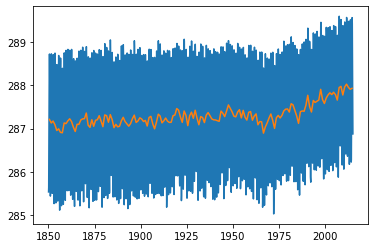

In [10]:
plt.plot(np.arange(1850+1/24, 2015, 1/12), cube_monthly_mean.data)
plt.plot(np.arange(1850.5, 2015), cube_annual_mean.data)